In [1]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

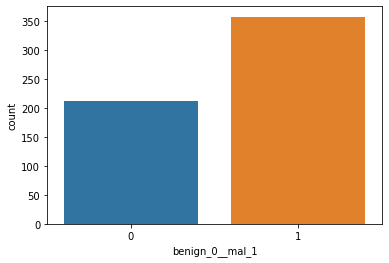

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

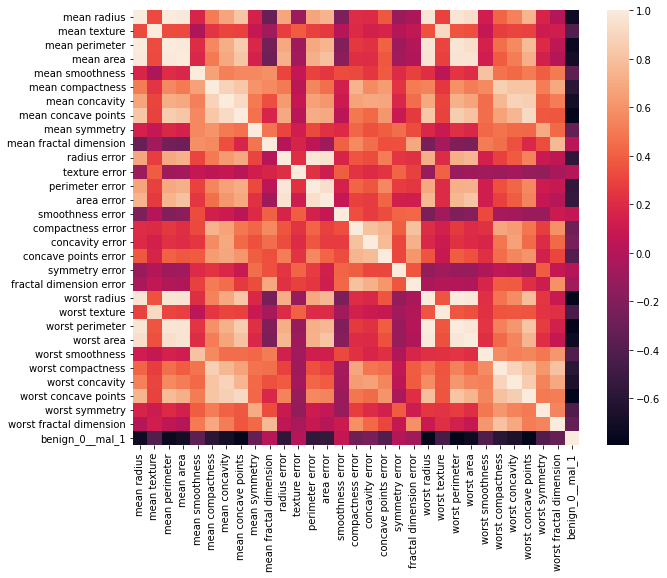

In [6]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr())

In [7]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

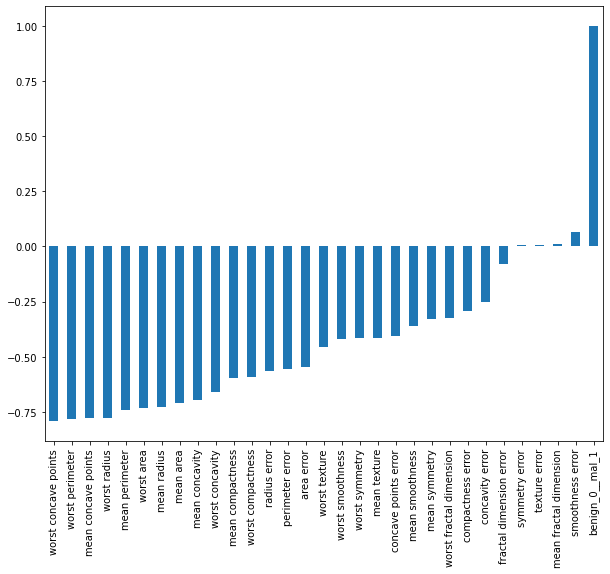

In [8]:
plt.figure(figsize = (10,8))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

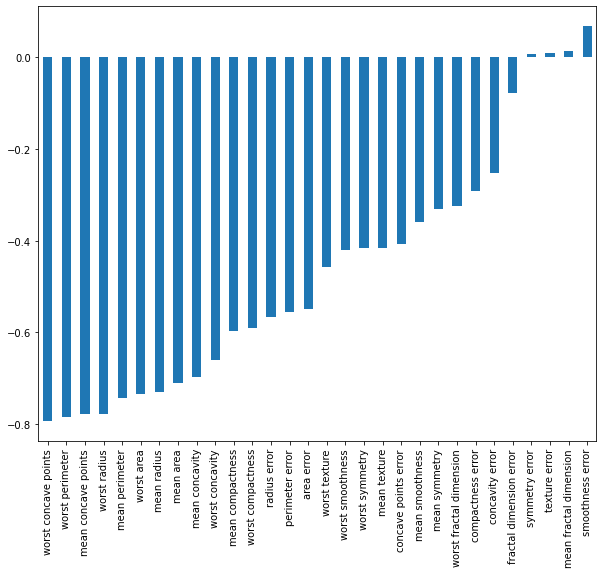

In [9]:
plt.figure(figsize = (10,8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [10]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train.shape

(426, 30)

In [15]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [16]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6850 - val_loss: 0.6687
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6531 - val_loss: 0.6369
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6184 - val_loss: 0.6022
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5817 - val_loss: 0.5638
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5396 - val_loss: 0.5170
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4887 - val_loss: 0.4629
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4393 - val_loss: 0.4117
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3922 - val_loss: 0.3662
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3516 - val_loss: 0.3247
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3133 - val_loss: 0.2906
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0480 - val_loss: 0.1142
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0506 - val_loss: 0.1264
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0459 - val_loss: 0.1130
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0459 - val_loss: 0.1161
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0460 - val_loss: 0.1176
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0510 - val_loss: 0.1207
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0452 - val_loss: 0.1155
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0448 - val_loss: 0.1163
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0454 - val_loss: 0.1189
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0441 - val_loss: 0.1178
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0311 - val_loss: 0.1305
Epoch 165/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0331 - val_loss: 0.1173
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0298 - val_loss: 0.1267
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0298 - val_loss: 0.1206
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0297 - val_loss: 0.1208
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0304 - val_loss: 0.1227
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0286 - val_loss: 0.1277
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0290 - val_loss: 0.1178
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0313 - val_loss: 0.1280
Epoch 173/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0286 - val_loss: 0.1197
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0215 - val_loss: 0.1138
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0202 - val_loss: 0.1340
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.1109
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0218 - val_loss: 0.1520
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0223 - val_loss: 0.1161
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0206 - val_loss: 0.1187
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0190 - val_loss: 0.1125
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0215 - val_loss: 0.1300
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0199 - val_loss: 0.1163
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0196 - val_loss: 0.1377
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0128 - val_loss: 0.1202
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0123 - val_loss: 0.1358
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0126 - val_loss: 0.1188
Epoch 329/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0138 - val_loss: 0.1245
Epoch 330/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0130 - val_loss: 0.1203
Epoch 331/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0126 - val_loss: 0.1272
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0114 - val_loss: 0.1207
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0117 - val_loss: 0.1213
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.1290
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0144 - val_loss: 0.1163
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0082 - val_loss: 0.1433
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.1312
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0102 - val_loss: 0.1381
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.1345
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.1442
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.1323
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0082 - val_loss: 0.1370
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.1371
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0073 - val_loss: 0.1382
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 0.1385
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.1731
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0139 - val_loss: 0.1499
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.1492
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0073 - val_loss: 0.1710
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.1731
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.1765
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.1543
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.1600
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.1601
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.1637
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.1930
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.1932
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.1870
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.1896
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.1905
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.1855
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.1946
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.1945
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.1918
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.1944
Epoc

In [17]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

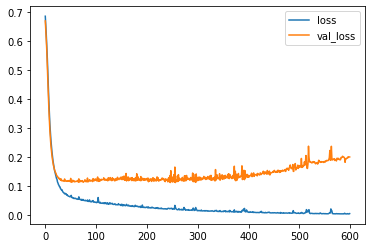

In [18]:
model_loss.plot()

In [19]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [20]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [21]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6824 - val_loss: 0.6612
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6474 - val_loss: 0.6409
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6229 - val_loss: 0.6184
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5968 - val_loss: 0.5887
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5625 - val_loss: 0.5523
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5268 - val_loss: 0.5123
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4872 - val_loss: 0.4711
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4454 - val_loss: 0.4268
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4030 - val_loss: 0.3805
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3595 - val_loss: 0.3366
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0560 - val_loss: 0.1221
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0557 - val_loss: 0.1252
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0552 - val_loss: 0.1202
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0544 - val_loss: 0.1266
Epoch 00086: early stopping


<AxesSubplot:>

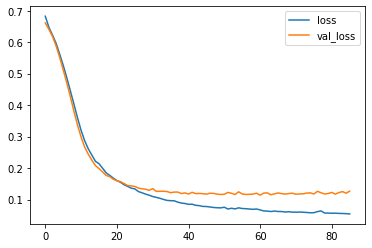

In [22]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [23]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [24]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.7068 - val_loss: 0.6763
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6864 - val_loss: 0.6575
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6694 - val_loss: 0.6353
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6318 - val_loss: 0.6156
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6218 - val_loss: 0.5886
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6081 - val_loss: 0.5673
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5781 - val_loss: 0.5420
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5592 - val_loss: 0.5163
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5402 - val_loss: 0.4898
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5502 - val_loss: 0.4612
Epoch 11/

14/14 [==============================] - 0s 4ms/step - loss: 0.1236 - val_loss: 0.1092
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1394 - val_loss: 0.1230
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0918 - val_loss: 0.1081
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1307 - val_loss: 0.1093
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1074 - val_loss: 0.1293
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1237 - val_loss: 0.1193
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1091 - val_loss: 0.1089
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0992 - val_loss: 0.1246
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1156 - val_loss: 0.1178
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1125 - val_loss: 0.1101
Epoch 93/600


<AxesSubplot:>

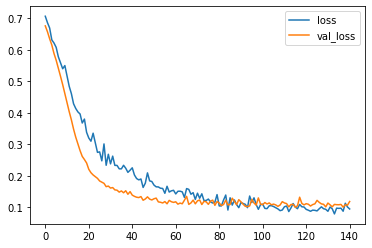

In [25]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [26]:
#predictions = model.predict_classes(X_test)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [28]:
print(confusion_matrix(y_test,y_pred))

[[54  1]
 [ 3 85]]
